This dataset presents transactions that occurred in two days by european cardholders., where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation, this is being done due to confidentiality. issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA
Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. Feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

#### Importing required libraries

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

#### Loading Dataset into Memory

In [44]:
df = pd.read_csv('/home/eduaman14892859/creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
f'Shape of our dataset is {df.shape}'

'Shape of our dataset is (284807, 31)'

#### Target variable distribution

0    0.998273
1    0.001727
Name: Class, dtype: float64


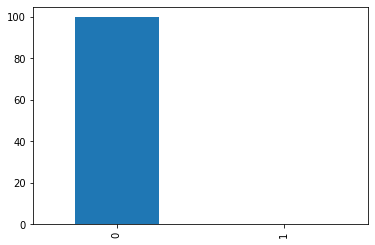

In [5]:
print(df['Class'].value_counts(normalize=True))
(df['Class'].value_counts(normalize=True)*100).plot(kind = 'bar')

##### Outlier Fraction in the data

In [36]:
fraud_txn = df[df['Class'] == 1]
valid_txn = df[df['Class'] == 0]

outlier_fraction = len(fraud_txn)/float(len(valid_txn))
print(f'Percentage of Anamoly/Outlier in the data is : {outlier_fraction}')

print('Fraud Cases : {}'.format(len(df[df['Class'] == 1])))
print('Valid Cases : {}'.format(len(df[df['Class'] == 0])))

Percentage of Anamoly/Outlier in the data is : 0.0017304750013189597
Fraud Cases : 492
Valid Cases : 284315


/usr/local/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


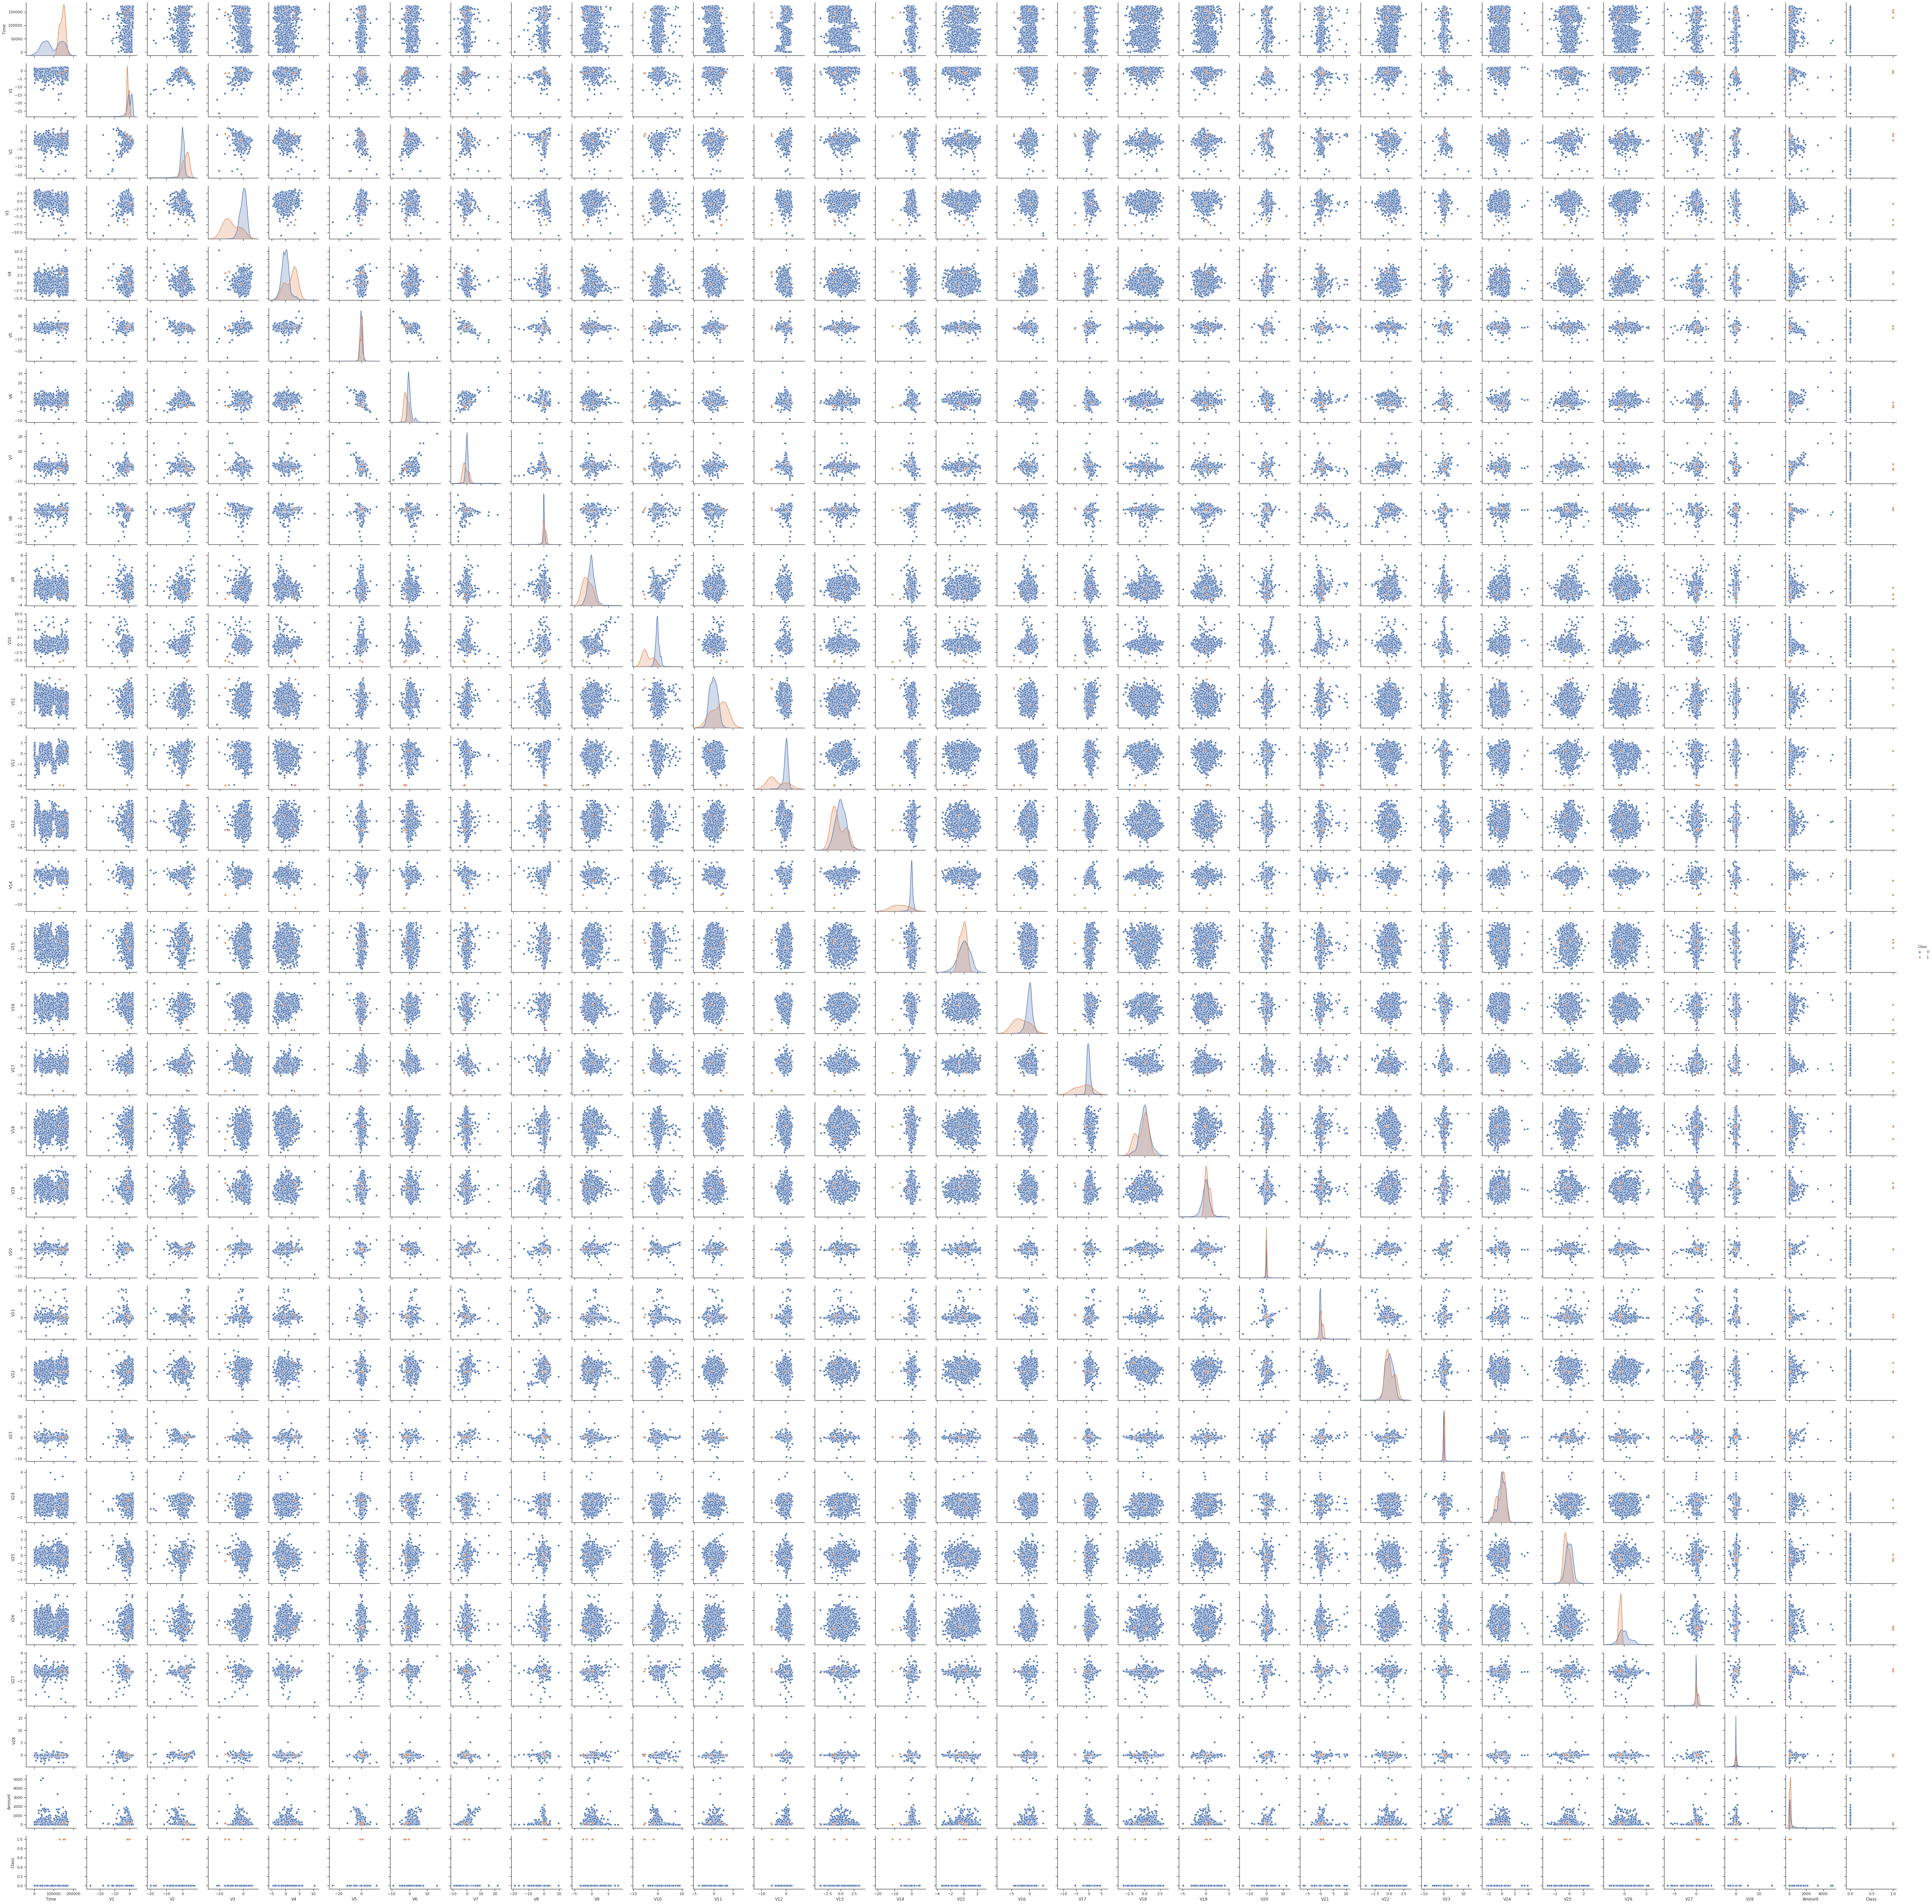

In [6]:
sample_data = df.sample(frac=0.01, random_state = 1)
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(sample_data, hue="Class")

#### Splitting Independent and Dependent Variables

In [ ]:
'''
X = df.iloc[:,0:-1].values      # df.drop(['Class'],axis=1)
Y = df.iloc[:,-1].values
'''
X=df.iloc[:,0:-1]      # df.drop(['Class'],axis=1) , take All columns, except Last one
Y=df.iloc[:,-1]

#### Standardisarion

In [46]:
standardised = StandardScaler()
X_scaled = standardised.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, index = X.index, columns = X.columns)
X_scaled.head()

Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068   
1 -1.996583  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820   
2 -1.996562 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454   
3 -1.996562 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150   
4 -1.996541 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0  0.193679  0.082637  0.331128  ...  0.326118 -0.024923  0.382854 -0.176911   
1 -0.063700  0.071253 -0.232494  ... -0.089611 -0.307377 -0.880077  0.162201   
2  0.639776  0.207373 -1.378675  ...  0.680975  0.337632  1.063358  1.456320   
3  0.192071  0.316018 -1.262503  ... -0.269855 -0.147443  0.007267 -0.304777   
4  0.479302 -0.226510  0.744326  ...  0.529939 -0.012839  1.100011 -0.220123   

        V24       V25       V26       V27       V28    Amount  
0  0.110507  0.246585 -0.392170  0.330892 -0.063781  0.244964  
1 -0.561131  0.320694  0.261069 -0.022256  0.044608 -0.342475  
2 -1.138092 -0.628537 -0.288447 -0.137137 -0.181021  1.160686  
3 -1.941027  1.241904 -0.460217  0.155396  0.186189  0.140534  
4  0.233250 -0.395202  1.041611  0.543620  0.651816 -0.073403  

[5 rows x 30 columns]

#### Train Test Split Dataset

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=0)

print(f'Shape of our training data is : {X_train.shape}')
print(f'Shape of our training label is : {y_train.shape}')
print(f'Shape of our testing data is : {X_test.shape}')
print(f'Shape of our testing label is : {y_test.shape}')

Shape of our training data is : (227845, 30)
Shape of our training label is : (227845,)
Shape of our testing data is : (56962, 30)
Shape of our testing label is : (56962,)


### TSNE T-distributed Stochastic Neighbor Embedding
- It's more expensive than PCA and LDA but it actually gives better results for complex data.
- Internally , it works as follows :
- A. Compute similarity matrix between all feature vectors.
- B. Then it computes the similarity matrix from map points.
- C. Finally, use gradient descent to minimimze distance between matrices.

#### TSNE Plot on Scaled Data

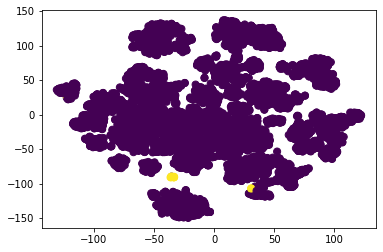

In [56]:
from sklearn.manifold import t_sne

dim_sne = t_sne.TSNE(n_components=2, n_iter=5000)
tsne_reduced_dim = dim_sne.fit_transform(X_train[:10000])

plt.scatter(tsne_reduced_dim[:,0], tsne_reduced_dim[:,1], c = y_train[:10000] , s =50)        

#### TSNE Plot on Un-Scaled Data

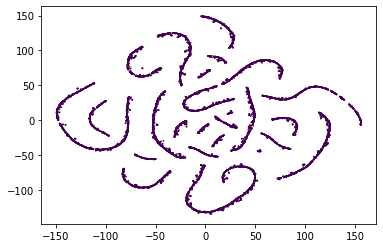

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

dim_sne = t_sne.TSNE(n_components=2, n_iter=5000)
tsne_reduced_dim = dim_sne.fit_transform(X_train[:10000])

plt.scatter(tsne_reduced_dim[:,0], tsne_reduced_dim[:,1], c = y_train[:10000] , s = 0.5)        

#### Model Architecture

In [10]:
model = Sequential()
model.add(Dense(40, input_dim=30, init = 'he_normal', activation = 'relu'))   # glorot_uniform is default
model.add(Dense(30, input_dim=40, init = 'he_normal', activation = 'relu'))
model.add(Dense(20, input_dim=30, init = 'he_normal', activation = 'relu'))
model.add(Dense(10, input_dim=20, init = 'he_normal', activation = 'relu'))
model.add(Dense(4,  input_dim=10, init = 'he_normal', activation = 'relu'))
model.add(Dense(1,  input_dim = 4 , activation = 'sigmoid'))
model.summary()

W0630 12:04:15.685690 140289029482304 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:72: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(40, input_dim=30, activation="relu", kernel_initializer="he_normal")`
  
W0630 12:04:15.707378 140289029482304 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:515: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0630 12:04:15.711859 140289029482304 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4095: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

/usr/local/anaconda/lib/python3.6/s

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                1240      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 44        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 3,349
Trainable params: 3,349
Non-trainable params: 0
_________________________________________________________________


#### Compiling , Fitting and Evaluating the model

In [11]:
model.compile(optimizer = 'adam', loss="binary_crossentropy", metrics= ['accuracy'])
model_info = model.fit(X_train, y_train, batch_size = 64, epochs = 10)

y_pred = model.predict_classes(X_test)
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1]*100)

W0630 12:04:27.385344 140289029482304 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/optimizers.py:782: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0630 12:04:27.409708 140289029482304 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3299: The name tf.log is deprecated. Please use tf.math.log instead.

W0630 12:04:27.415146 140289029482304 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
227845/227845 [==============================] - 8s 34us/step - loss: 0.0088 - acc: 0.9979
Epoch 2/10
227845/227845 [==============================] - 7s 31us/step - loss: 0.0034 - acc: 0.9994
Epoch 3/10
227845/227845 [==============================] - 7s 31us/step - loss: 0.0030 - acc: 0.9994
Epoch 4/10
227845/227845 [==============================] - 7s 33us/step - loss: 0.0026 - acc: 0.9994
Epoch 5/10
227845/227845 [==============================] - 8s 35us/step - loss: 0.0024 - acc: 0.9994
Epoch 6/10
227845/227845 [==============================] - 8s 36us/step - loss: 0.0024 - acc: 0.9994
Epoch 7/10
227845/227845 [==============================] - 7s 32us/step - loss: 0.0021 - acc: 0.9994
Epoch 8/10
227845/227845 [==============================] - 7s 32us/step - loss: 0.0021 - acc: 0.9994
Epoch 9/10
227845/227845 [==============================] - 7s 30us/step - loss: 0.0019 - acc: 0.9994
Epoch 10/10
56962/56962 [==============================] - 1s 21us/step
Test Score

#### Visualising Model Performance

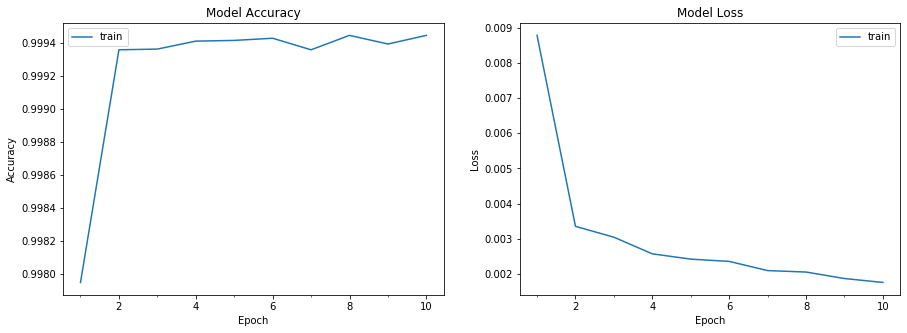

In [12]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
plot_model_history(model_info)

In [22]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix :', '\n', cm, '\n')
print('Classification report :', '\n', classification_report(y_test, y_pred), '\n')
print('Summary Scores are : \n')
Accuracy = ((cm[0][0] + cm[1][1]) / cm.sum()) *100
print("Accuracy    : ", Accuracy)

Error_rate = ((cm[0][1] + cm[1][0]) / cm.sum()) *100
print("Error_rate  : ", Error_rate)

# True Fraud Rate
Specificity = (cm[1][1] / (cm[1][1] + cm[0][1])) *100
print("Specificity : ", Specificity)

# True Genuine Rate
Sensitivity = (cm[0][0] / (cm[0][0] + cm[1][0])) *100
print("Sensitivity : ", Sensitivity)

Confusion matrix : 
 [[56853     8]
 [   33    68]] 

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.89      0.67      0.77       101

    accuracy                           1.00     56962
   macro avg       0.95      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962
 

Summary Scores are : 

Accuracy    :  99.92802219023208
Error_rate  :  0.07197780976791544
Specificity :  89.47368421052632
Sensitivity :  99.94198924164118
